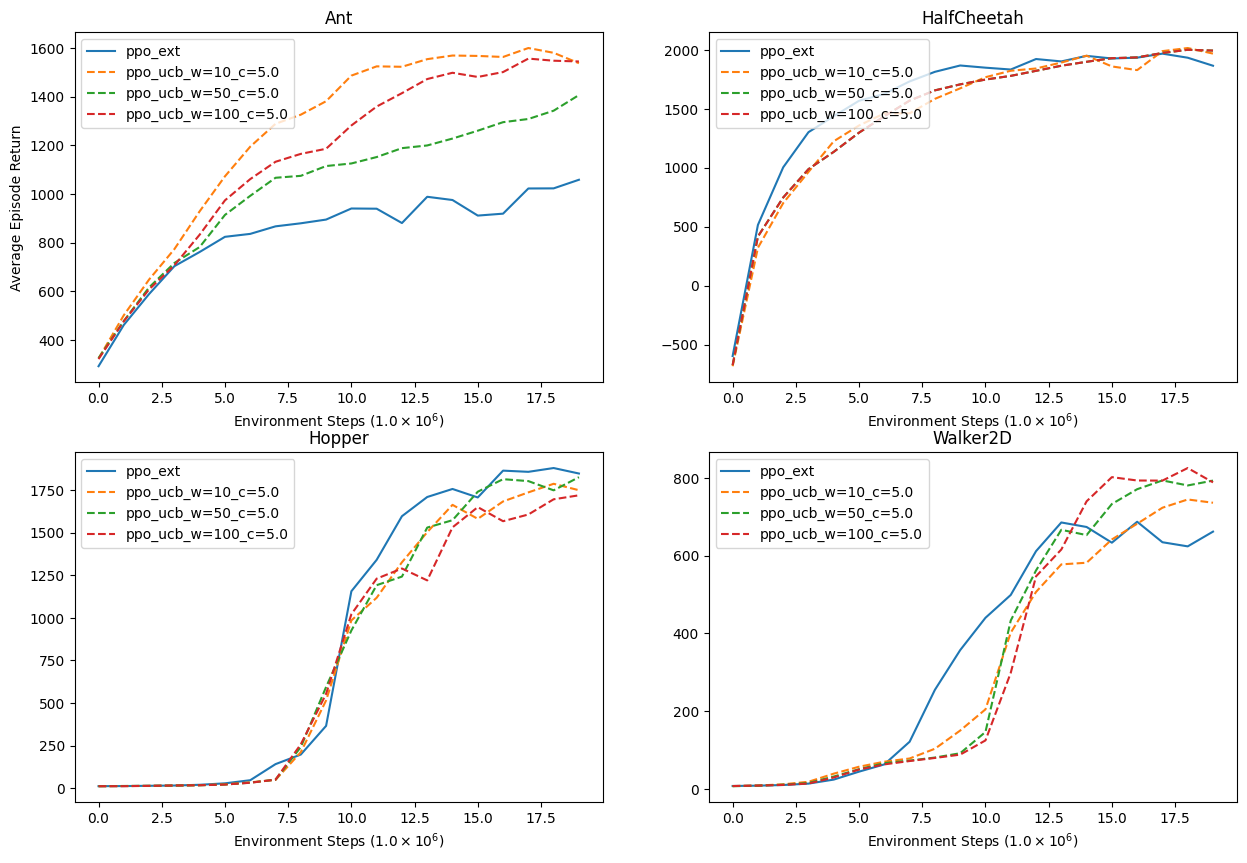

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape

    for i in range(num_runs):
        last_value = values[i, 0]
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value

    return smoothed_values

def sliding_window_smooth(values, window_size=5):
    num_runs, num_points = values.shape
    new_num_points = num_points // window_size # Number of windows per run
    smoothed_values = np.zeros((num_runs, new_num_points))

    for i in range(num_runs):
        for j in range(new_num_points):
            # Compute the average of each non-overlapping window
            start_idx = j * window_size
            end_idx = start_idx + window_size
            smoothed_values[i, j] = np.mean(values[i, start_idx:end_idx])

    return smoothed_values


names = ['Ant', 'HalfCheetah', 'Hopper', 'Walker2D']
envs = ['ant', 'halfcheetah', 'hopper', 'walker']

algos = [
        'ppo_ext', 
        # 'ppo_rr', 
        'ppo_ucb_w=10_c=5.0', 'ppo_ucb_w=50_c=5.0', 'ppo_ucb_w=100_c=5.0',
        # 'ppo_ucb_w=10_c=1.0', 'ppo_ucb_w=50_c=1.0', 'ppo_ucb_w=100_c=1.0',
]
         

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    for algo in algos:
        root = f'./logs/{algo}/{env}/'
        all_returns = []
        for seed in range(1, 4):
            df = pd.read_csv(os.path.join(root, f'{seed}.monitor.csv'), skiprows=1, sep=',')['r'].to_numpy()
            all_returns.append(df[np.linspace(0, len(df) - 1, 1000).astype(int)])
        all_returns = np.stack(all_returns)

        # all_returns = smooth_tensorboard(all_returns, 0.8)
        all_returns = sliding_window_smooth(all_returns, 50)

        mean = np.mean(all_returns, axis=0)
        std = np.std(all_returns, axis=0)

        # mean += 100 if 'ppo_ext' in algo else 0

        ax.plot(mean, label=algo, linestyle='--' if 'ucb' in algo else '-')
        # ax.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)

    ax.set_title(names[idx])
    ax.legend(loc='upper left')
    if idx == 0:
        ax.set_ylabel('Average Episode Return')
    ax.set_xlabel(r'Environment Steps ($1.0\times 10^6$)')

Text(0.5, 0, 'Environment Steps ($1.0\\times 10^6$)')

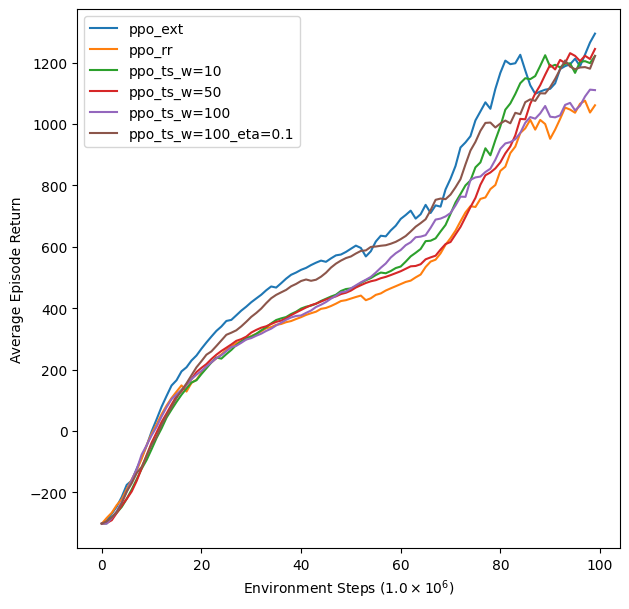

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape

    for i in range(num_runs):
        last_value = values[i, 0]
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value

    return smoothed_values

names = ['Ant', 'HalfCheetah', 'Hopper', 'Walker2D']
envs = ['ant', 'halfcheetah', 'hopper', 'walker']

algos = ['ppo_ext', 
         'ppo_rr', 
        #  'ppo_ucb_c=1.0_w=10', 'ppo_ucb_c=5.0_w=10', 'ppo_ucb_c=5.0_w=50', 'ppo_ucb_c=5.0_w=100',
        'ppo_ts_w=10', 'ppo_ts_w=50', 'ppo_ts_w=100', 'ppo_ts_w=100_eta=0.1'
        #  'ppo_ts_w=10', 'ppo_ts_w=50', 'ppo_ts_w=100', 'ts'
]
         

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

for algo in algos:
    all_returns = []
    for idx, env in enumerate(envs):
        root = f'./logs/{algo}/{env}/'
        env_returns = []
        for seed in range(1, 4):
            df = pd.read_csv(os.path.join(root, f'{seed}.monitor.csv'), skiprows=1, sep=',')['r'].to_numpy()
            env_returns.append(df[np.linspace(0, len(df) - 1, 100).astype(int)])
        env_returns = np.stack(env_returns)
        all_returns.append(env_returns.mean(axis=0))
    all_returns = np.stack(all_returns)
    all_returns = smooth_tensorboard(all_returns, 0.8)

    mean = np.mean(all_returns, axis=0)
    std = np.std(all_returns, axis=0)

    ax.plot(mean, label=algo)
    # ax.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)

ax.legend(loc='upper left')
ax.set_ylabel('Average Episode Return')
ax.set_xlabel(r'Environment Steps ($1.0\times 10^6$)')

In [17]:
import numpy as np
import pandas as pd
import os

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape

    for i in range(num_runs):
        last_value = values[i, 0]
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value

    return smoothed_values

names = ['Ant', 'HalfCheetah', 'Hopper', 'Walker2D']
envs = ['ant', 'halfcheetah', 'hopper', 'walker']

algos = [
         'ppo_ucb_c=1.0_w=10', 'ppo_ucb_c=5.0_w=10', 'ppo_ucb_c=5.0_w=50', 'ppo_ucb_c=5.0_w=100',
        #  'ppo_ts_w=10', 'ppo_ts_w=50', 'ppo_ts_w=100', 'ts'
]

best_ucb = {env: None for env in envs}

for idx, env in enumerate(envs):
    all_final_returns = []
    for algo in algos:
        root = f'./logs/{algo}/{env}/'
        all_returns = []
        for seed in range(1, 4):
            df = pd.read_csv(os.path.join(root, f'{seed}.monitor.csv'), skiprows=1, sep=',')['r'].to_numpy()
            all_returns.append(df[np.linspace(0, len(df) - 1, 100).astype(int)])
        all_returns = np.stack(all_returns)

        all_returns = smooth_tensorboard(all_returns, 0.8)
        mean = np.mean(all_returns, axis=0)
        all_final_returns.append(mean[-1])
    
    best_ucb[env] = algos[np.argmax(all_final_returns)]

print(best_ucb)

{'ant': 'ppo_ucb_c=5.0_w=10', 'halfcheetah': 'ppo_ucb_c=5.0_w=50', 'hopper': 'ppo_ucb_c=1.0_w=10', 'walker': 'ppo_ucb_c=1.0_w=10'}


In [18]:
import numpy as np
import pandas as pd
import os

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape

    for i in range(num_runs):
        last_value = values[i, 0]
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value

    return smoothed_values

names = ['Ant', 'HalfCheetah', 'Hopper', 'Walker2D']
envs = ['ant', 'halfcheetah', 'hopper', 'walker']

algos = ['ppo_ts_w=10', 'ppo_ts_w=50', 'ppo_ts_w=100', 'ppo_ts_w=100_eta=0.1']

best_ts = {env: None for env in envs}

for idx, env in enumerate(envs):
    all_final_returns = []
    for algo in algos:
        root = f'./logs/{algo}/{env}/'
        all_returns = []
        for seed in range(1, 4):
            df = pd.read_csv(os.path.join(root, f'{seed}.monitor.csv'), skiprows=1, sep=',')['r'].to_numpy()
            all_returns.append(df[np.linspace(0, len(df) - 1, 100).astype(int)])
        all_returns = np.stack(all_returns)

        all_returns = smooth_tensorboard(all_returns, 0.8)
        mean = np.mean(all_returns, axis=0)
        all_final_returns.append(mean[-1])
    
    best_ts[env] = algos[np.argmax(all_final_returns)]

print(best_ts)

{'ant': 'ppo_ts_w=10', 'halfcheetah': 'ppo_ts_w=100_eta=0.1', 'hopper': 'ppo_ts_w=10', 'walker': 'ppo_ts_w=50'}


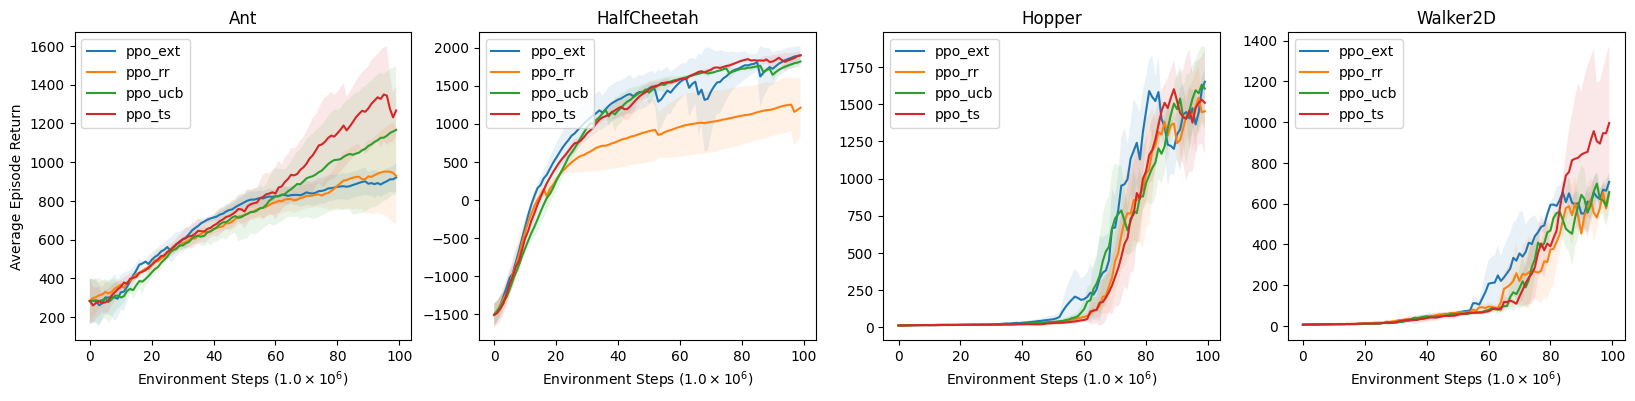

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape

    for i in range(num_runs):
        last_value = values[i, 0]
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value

    return smoothed_values

names = ['Ant', 'HalfCheetah', 'Hopper', 'Walker2D']
envs = ['ant', 'halfcheetah', 'hopper', 'walker']

algos = ['ppo_ext', 'ppo_rr', "ppo_ucb", 'ppo_ts']
best_ucb = {'ant': 'ppo_ucb_c=5.0_w=10', 'halfcheetah': 'ppo_ucb_c=5.0_w=50', 'hopper': 'ppo_ucb_c=5.0_w=50', 'walker': 'ppo_ucb_c=5.0_w=50'}
best_ts = {'ant': 'ppo_ts_w=10', 'halfcheetah': 'ppo_ts_w=100_eta=0.1', 'hopper': 'ppo_ts_w=10', 'walker': 'ppo_ts_w=50'}
         

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    for algo in algos:
        if algo == 'ppo_ucb':
            mark = best_ucb[env]
        elif algo == 'ppo_ts':
            mark = best_ts[env]
        else:
            mark = algo
        root = f'./logs/{mark}/{env}/'
        all_returns = []
        for seed in range(1, 4):
            df = pd.read_csv(os.path.join(root, f'{seed}.monitor.csv'), skiprows=1, sep=',')['r'].to_numpy()
            all_returns.append(df[np.linspace(0, len(df) - 1, 100).astype(int)])
        all_returns = np.stack(all_returns)

        all_returns = smooth_tensorboard(all_returns, 0.8)

        mean = np.mean(all_returns, axis=0)
        std = np.std(all_returns, axis=0)

        ax.plot(mean, label=algo)
        ax.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.1)

    ax.set_title(names[idx])
    ax.legend(loc='upper left')
    if idx == 0:
        ax.set_ylabel('Average Episode Return')
    ax.set_xlabel(r'Environment Steps ($1.0\times 10^6$)')